# Define the libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from datetime import timedelta
import math
import scipy.integrate
import statistics as cal
from scipy import signal

# Define Function

In [2]:
def PlotData(Begin,Duration,Mistake,OncourtFrame,OncourtVideo,Time,Data1,Data2,Data3,Data4,Figuur,player,pdf):
    Start = int((((OncourtFrame - OncourtVideo)*100) + Begin/10) - Mistake*100)
    Stop = int(Start + Duration*100)
    fig, ax = plt.subplots()
    ax.plot(Time[Start:Stop],Data1[Start:Stop],'r',Time[Start:Stop],Data2[Start:Stop],'b',Time[Start:Stop],Data3[Start:Stop],'g',Time[Start:Stop],Data4[Start:Stop])
    ax.legend(['Wheel Rotation Speed','Frame Rotation Speed','extra','Mean'])
    ax.set_xlabel('Time (sec)')
    ax.set_title("Fast offence " + str(Figuur) + ", " + str(player) + ", Video Time = " + str(timedelta(seconds=(int(Begin/1000)-Mistake))))
    pdf.savefig()
    
    
    
    
    
    
    
def lpfilter(cutoff_freq,var1,sampling_freq):
    Order = 5
    sampling_duration = len(var1)/5

    normalized_cutoff_freq = 2 * cutoff_freq / sampling_freq
    numerator_coeffs, denominator_coeffs = signal.butter(Order, normalized_cutoff_freq)
    filtered_var1 = signal.lfilter(numerator_coeffs, denominator_coeffs, var1)
    
    return filtered_var1

# Visualize Data
## Define player and match

In [3]:
Player = 15
Game = 2

## Insert Data player

In [4]:
df_Player = pd.read_csv('matrix_Player_' + str(Player) + '_game_' + str(Game) + '.csv')
df_Player.columns = ['frAcc','frRoAcc','frDispl','frRoAng','frSpeed','timeLine','frameRotationalSpeedX','frameRotationalSpeedY','frameRotationalSpeedZ','wheelRotationalSpeedX','wheelRotationalSpeedY','wheelRotationalSpeedZ','frRoSpeed']
df_Action = pd.read_csv('Ned_DUI_Game_' + str(Game) + '.csv')
df_Player

,frAcc,frRoAcc,frDispl,frRoAng,frSpeed,timeLine,frameRotationalSpeedX,frameRotationalSpeedY,frameRotationalSpeedZ,wheelRotationalSpeedX,wheelRotationalSpeedY,wheelRotationalSpeedZ,frRoSpeed
0,0.000000,0.0,0.0,0.00000,0.000000,0.01,NaN,NaN,NaN,NaN,NaN,NaN,0.00000
1,0.000000,0.0,0.0,0.00000,0.000000,0.02,NaN,NaN,NaN,NaN,NaN,NaN,0.00000
2,0.000000,0.0,0.0,0.00000,0.000000,0.03,NaN,NaN,NaN,NaN,NaN,NaN,0.00000
3,0.000000,0.0,0.0,0.00000,0.000000,0.04,NaN,NaN,NaN,NaN,NaN,NaN,0.00000
4,0.000000,0.0,0.0,0.00000,0.000000,0.05,NaN,NaN,NaN,NaN,NaN,NaN,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
860405,-0.002098,6556.8,-1946.6,-0.18538,-0.000787,8604.10,1.0500,0.85556,-1.0500,1.4000,1.16670,-1.5867,-0.40135
860406,-0.026347,6556.8,-1946.6,-0.18939,-0.000808,8604.10,1.0920,0.93100,-1.0710,1.4000,1.09200,-1.6240,-5.03910
860407,0.012933,6556.8,-1946.6,-0.23979,-0.001071,8604.10,1.1690,0.95900,-1.1200,1.4000,1.08110,-1.5089,NaN
860408,NaN,NaN,NaN,NaN,NaN,NaN,1.1433,0.93333,-1.0967,1.4000,1.08500,-1.4700,NaN


## Define boundaries
### Get Timestamps from CSV

In [5]:
df_Action_Player = df_Action.loc[df_Action["Players Group Box"] == ("Player " + str(Player))]
df_Action_Player_Fast_defence = df_Action_Player.loc[df_Action_Player["Player"] == "Fast break"]#.iloc[::-1]
Timestamp = df_Action_Player_Fast_defence.Position.to_numpy()
print(len(Timestamp))
Timestamp

7


array([ 268440,  304760,  788800, 1617800, 3143280, 3750200, 3789200])

### Synchronize
Times consist of the oncourt times in the video and the oncourt frames in Matlab

In [6]:
Times = [
         [(47.40),3580],
         [((22*60)+56.32),4903],
         [((40*60)+54),6473.8],
         [((60*60)+51.60),7668.7]
        ]
Times[0][0]

47.4

In [20]:
Error = [6,5,5,5,10,5,5]
print(len(Error))


FRSZint = []

df_Player['frAcc2'] = df_Player.frAcc*10   #influences the sprint
df_Player['frRoAcc2'] = df_Player.frRoAcc   #the rotational things is something to work on
df_Player['frSpeed2'] = df_Player.frSpeed*100     # influences the speed

df_Player['frRoSpeed2'] = lpfilter(0.2,(df_Player.frRoSpeed*0.3),5)

df_Player['FRSX2'] = df_Player.frameRotationalSpeedX*10      #influenced by fast offence or fast defence
df_Player['FRSY2'] = df_Player.frameRotationalSpeedY*10      #influenced by speed&Rotatons
#df_Player['frZ+Y']


df_Player['WRSZ2'] = df_Player.wheelRotationalSpeedZ*5      #variable for sprint
df_Player['WRSY2'] = df_Player.wheelRotationalSpeedY*3      #variable for rotations


df_Player['WRSXDiff'] = np.insert(np.diff(df_Player.wheelRotationalSpeedX,n=1)*6,0,0)
df_Player['FRSZDiff'] = np.insert(np.diff(df_Player.frameRotationalSpeedZ,n=1)*12,0,0)   #variable for rotations'
df_Player['extra']= (df_Player.wheelRotationalSpeedX+df_Player.frameRotationalSpeedZ)
df_Player['MeanfrRoSpZ'] = cal.mean(df_Player.frameRotationalSpeedZ)
df_Player['pop'] = df_Player.frameRotationalSpeedZ-df_Player['MeanfrRoSpZ']

#for i in range(100,len(df_Player),20):
 #   df_Player['frMean'][i] = cal.mean(((df_Player.frameRotationalSpeedZ[i-100:i])))
#for i in range(0,len(df_Player.frameRotationalSpeedZ)-1):
#FRSZint = np.insert(np.trapz(df_Player.frameRotationalSpeedZ.to_numpy(),df_Player.timeLine.to_numpy()),0,0)
#df_Player.wheelRotationalSpeedX=df_Player.wheelRotationalSpeedX*1.5
#df_Player.frameRotationalSpeedZ = df_Player.frameRotationalSpeedZ*5
print(df_Player[268434:268934])
#df_Player['intfrRoSpeed'] = np.insert(np.linspace(df_Player.frRoSpeed[0:860409],0,1),0,0)
#print(df_Player['difffrRoSpeed'])
print(FRSZint)



7
           frAcc  frRoAcc  frDispl  frRoAng  frSpeed  timeLine  \
268434  0.036339   2092.8   4626.5  -2.2018  0.66328    2684.3   
268435 -1.245100   2092.8   4626.5  -2.9373  0.66364    2684.4   
268436 -0.016753   2092.8   4626.5  -3.6614  0.65119    2684.4   
268437  0.760070   2092.9   4626.4  -4.0749  0.65102    2684.4   
268438 -1.460500   2092.9   4626.4  -4.3526  0.65863    2684.4   
...          ...      ...      ...      ...      ...       ...   
268929 -0.810740   2098.8   4610.6  33.9290  2.64020    2689.3   
268930 -0.319020   2098.8   4610.9  34.3680  2.63210    2689.3   
268931 -1.767200   2098.8   4611.3  34.1730  2.62890    2689.3   
268932  0.306270   2098.9   4611.6  34.0670  2.61120    2689.3   
268933 -0.569360   2098.9   4612.0  34.0320  2.61430    2689.3   

        frameRotationalSpeedX  frameRotationalSpeedY  frameRotationalSpeedZ  \
268434                 0.1400                 0.8100                -3.0800   
268435                 0.2800                 1

### Visualize

In [17]:
pdf = PdfPages('Player_' + str(Player) + '_' + str(Game) + '_fastdefences.pdf')

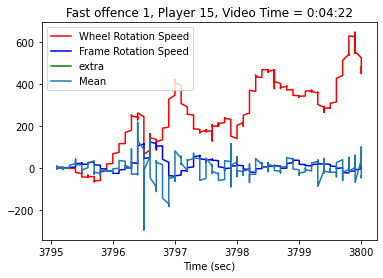

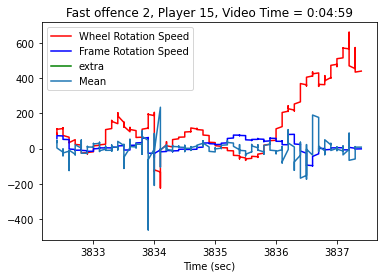

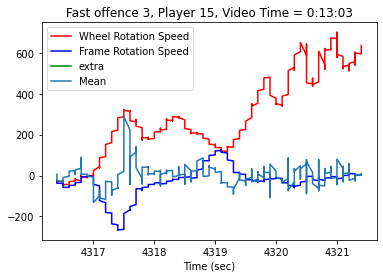

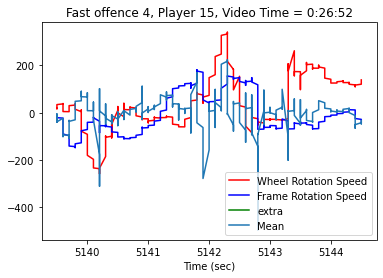

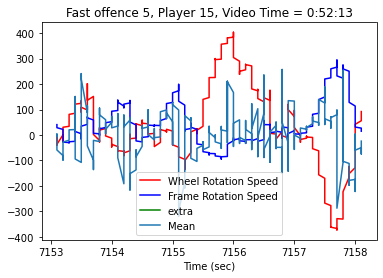

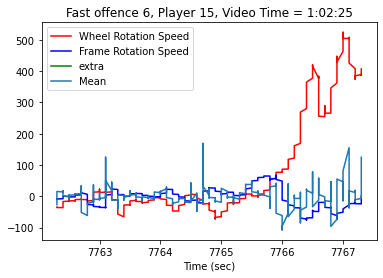

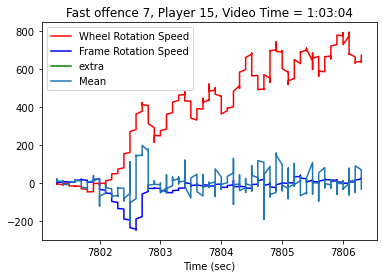

In [19]:
A='frAcc2'
B='frRoAcc2'
C='frSpeed2'
D='frRoSpeed2'
E='FRSX2'
F='FRSY2'
G='WRSZ2'
H='WRSY2'
I='WRSXDiff'
Z='FRSZDiff'

P='pop'


Quator = 0;
for i in range(0,len(Timestamp)):
    if Quator < (len(Times)-1):
        if Timestamp[i] >= (Times[Quator+1][0] * 1000):
            Quator = Quator + 1
    PlotData(Timestamp[i], 5, Error[i], Times[Quator][1], Times[Quator][0], df_Player.timeLine.to_numpy(), 
             df_Player.wheelRotationalSpeedX.to_numpy(), 
             df_Player.frameRotationalSpeedZ.to_numpy(),
             df_Player[P].to_numpy(),
             df_Player[Z].to_numpy(),
             i+1,('Player ' + str(Player)), pdf)


In [121]:
pdf.close()